## 🚀 Adaboost 

In the lecture, we covered boosting, which is a technique that takes a week classifier (i.e., a model that severely underfits) and transforms it into a strong classifier by making many instances of such classifier and sequentially training them such that each subsequent one learns from the mistakes of the previous ones.

An example of a week classifier is a decision stump. That is, a decision tree with one level. Such classifier is so week as it represents a constant hyperplane perpendicular to one of the axes (features).

$$
h_t(x) = 
\begin{cases} 
1, & \text{if } x_{\text{k}} > C \\
-1, & \text{otherwise}
\end{cases}
$$

In other words, ordinary linear classifiers take the form $w_1 x_1 + w_2 x_2 + ... +w_n x_n + w_o = 0$. Meanwhile, this classifier takes the form $x_k + w_o=0$. It only learns $w_o$ and attempts to choose the best feature $x_k$ to which the hyperplane will pass through.

### 💪 Training Algorithm

**Initialize the weights:** Set initial weights $w_i = \frac{1}{M}$ for each sample in the training set, where $M$ is the number of samples.

**For each iteration $t$ from 1 to $T$:**
1. **Train a weak classifier $h_t(x)$ using the training set weighted by $w_i$**

$$h_t(x) \leftarrow (x_1, x_2,...,x_m)$$

2. **Compute the error:** Compute the weighted error $\epsilon_t$ of the weak classifier:
   $$\epsilon_t = \sum_{i=1}^{N} w_i \cdot \mathbb{I}(y_i \neq h_t(x_i))$$
   
3. **Compute the weight $\alpha_t$ of the weak classifier**:
      $$\alpha_t = \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$$
   
4. **Update the training weights:**:
      $$w_i^{(t+1)} = w_i^{(t)} \cdot \exp(\alpha_t \mathbb{I}(y_i \neq h_t(x_i))$$
   

5. **Normalize the Weights:**
      $$w_i^{(t+1)} = \frac {w_i^{(t)}}{\sum_{i=1}^{M} w_i^{(t)}}$$

### 🔮 Inference Algorithm

3. **Output the final strong classifier:**
      $$H(x) = \text{argmax}_k(\sum_{t=1}^{T} \alpha_t \mathbb{I}(h_t(x) = k))$$


### 💎 Special Notes

- In general multiclass settings, inference takes place bu summing the $α$ of each group of classifier making the same vote for a specific class and then the class with the greatest sum is the final prediction as shown in the equation above. However, for your convenience we are implementing the binary classification version only here. **You should be able to easily show that** in this case if $y ∈ \{+1, -1\}$ the inference equation simplifies to:

 $$H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t h_t(x)\right)$$

- Notice that the term $\mathbb{I}(y_i \neq h_t(x_i))$ is used in both steps $(2)$ and $(4)$, we can compute it only once after training and use it in both expressions in the implementation


## 🧪 End-to-end Tests

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs, make_circles, make_moons
from sklearn.ensemble import AdaBoostClassifier
from Adaboost import Adaboost

### Test Fit

In [2]:
# Generate data
x_data, y_data = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=2, random_state=42)
y_data = np.where(y_data == 0, -1, 1)                                   # Convert labels to -1 and 1

# Training and evaluating the custom AdaBoost
T = 100

# Training and evaluating custom and Scikit Adaboosts:
adaboost_sklearn = AdaBoostClassifier(n_estimators=T, random_state=42, algorithm="SAMME")
adaboost_sklearn.fit(x_data, y_data)

adaboost_custom = Adaboost(T=T, random_state=42)
adaboost_custom.fit(x_data, y_data)
# Assert the classifier weights (alphas) are set correctly
assert np.allclose(adaboost_sklearn.estimator_weights_, adaboost_custom.αs)

### Test Predict

In [3]:
# Assert they make the same prediction
assert np.allclose(adaboost_custom.predict(x_data), adaboost_sklearn.predict(x_data))

## 😎  Put on Your Machine Learning Engineer Spectacles!

In [4]:
def plot_adaboost_contours(x_data, y_data, T_vals):
    num_plots = len(T_vals)
    num_cols = 4
    # TODO 1: Compute the number of rows in the plot given num_cols and num_plots
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    # creating the meshgrid based on the min, max values for each of the two features in x_data
    x1_min, x1_max = x_data[:, 0].min() - 0.1, x_data[:, 0].max() + 0.1
    x2_min, x2_max = x_data[:, 1].min() - 0.1, x_data[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
    
    plt.style.use('dark_background')
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows), dpi=200)
    
    # for each value of T, generate a plot
    for i, T in enumerate(T_vals):     
        # TODO 2: Instantiate and fit your model with the current value of T and 42 for random_state   
        adaboost = Adaboost(T=T, random_state=42)
        adaboost.fit(x_data, y_data)
        Z = adaboost.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        ax_curr = ax.flat[i]
        ax_curr.contourf(xx1, xx2, Z, alpha=1.0, cmap='cividis')
        ax_curr.scatter(x_data[:, 0], x_data[:, 1], c=y_data, s=20, edgecolor='k', cmap='plasma', linewidth=0.3)
        ax_curr.set_title(f'T={T}')
    
    # clean up unused plots
    for j in range(i+1, num_rows*num_cols):
        fig.delaxes(ax.flat[j])

    plt.tight_layout()
    plt.show()


#### Adaboost Operation

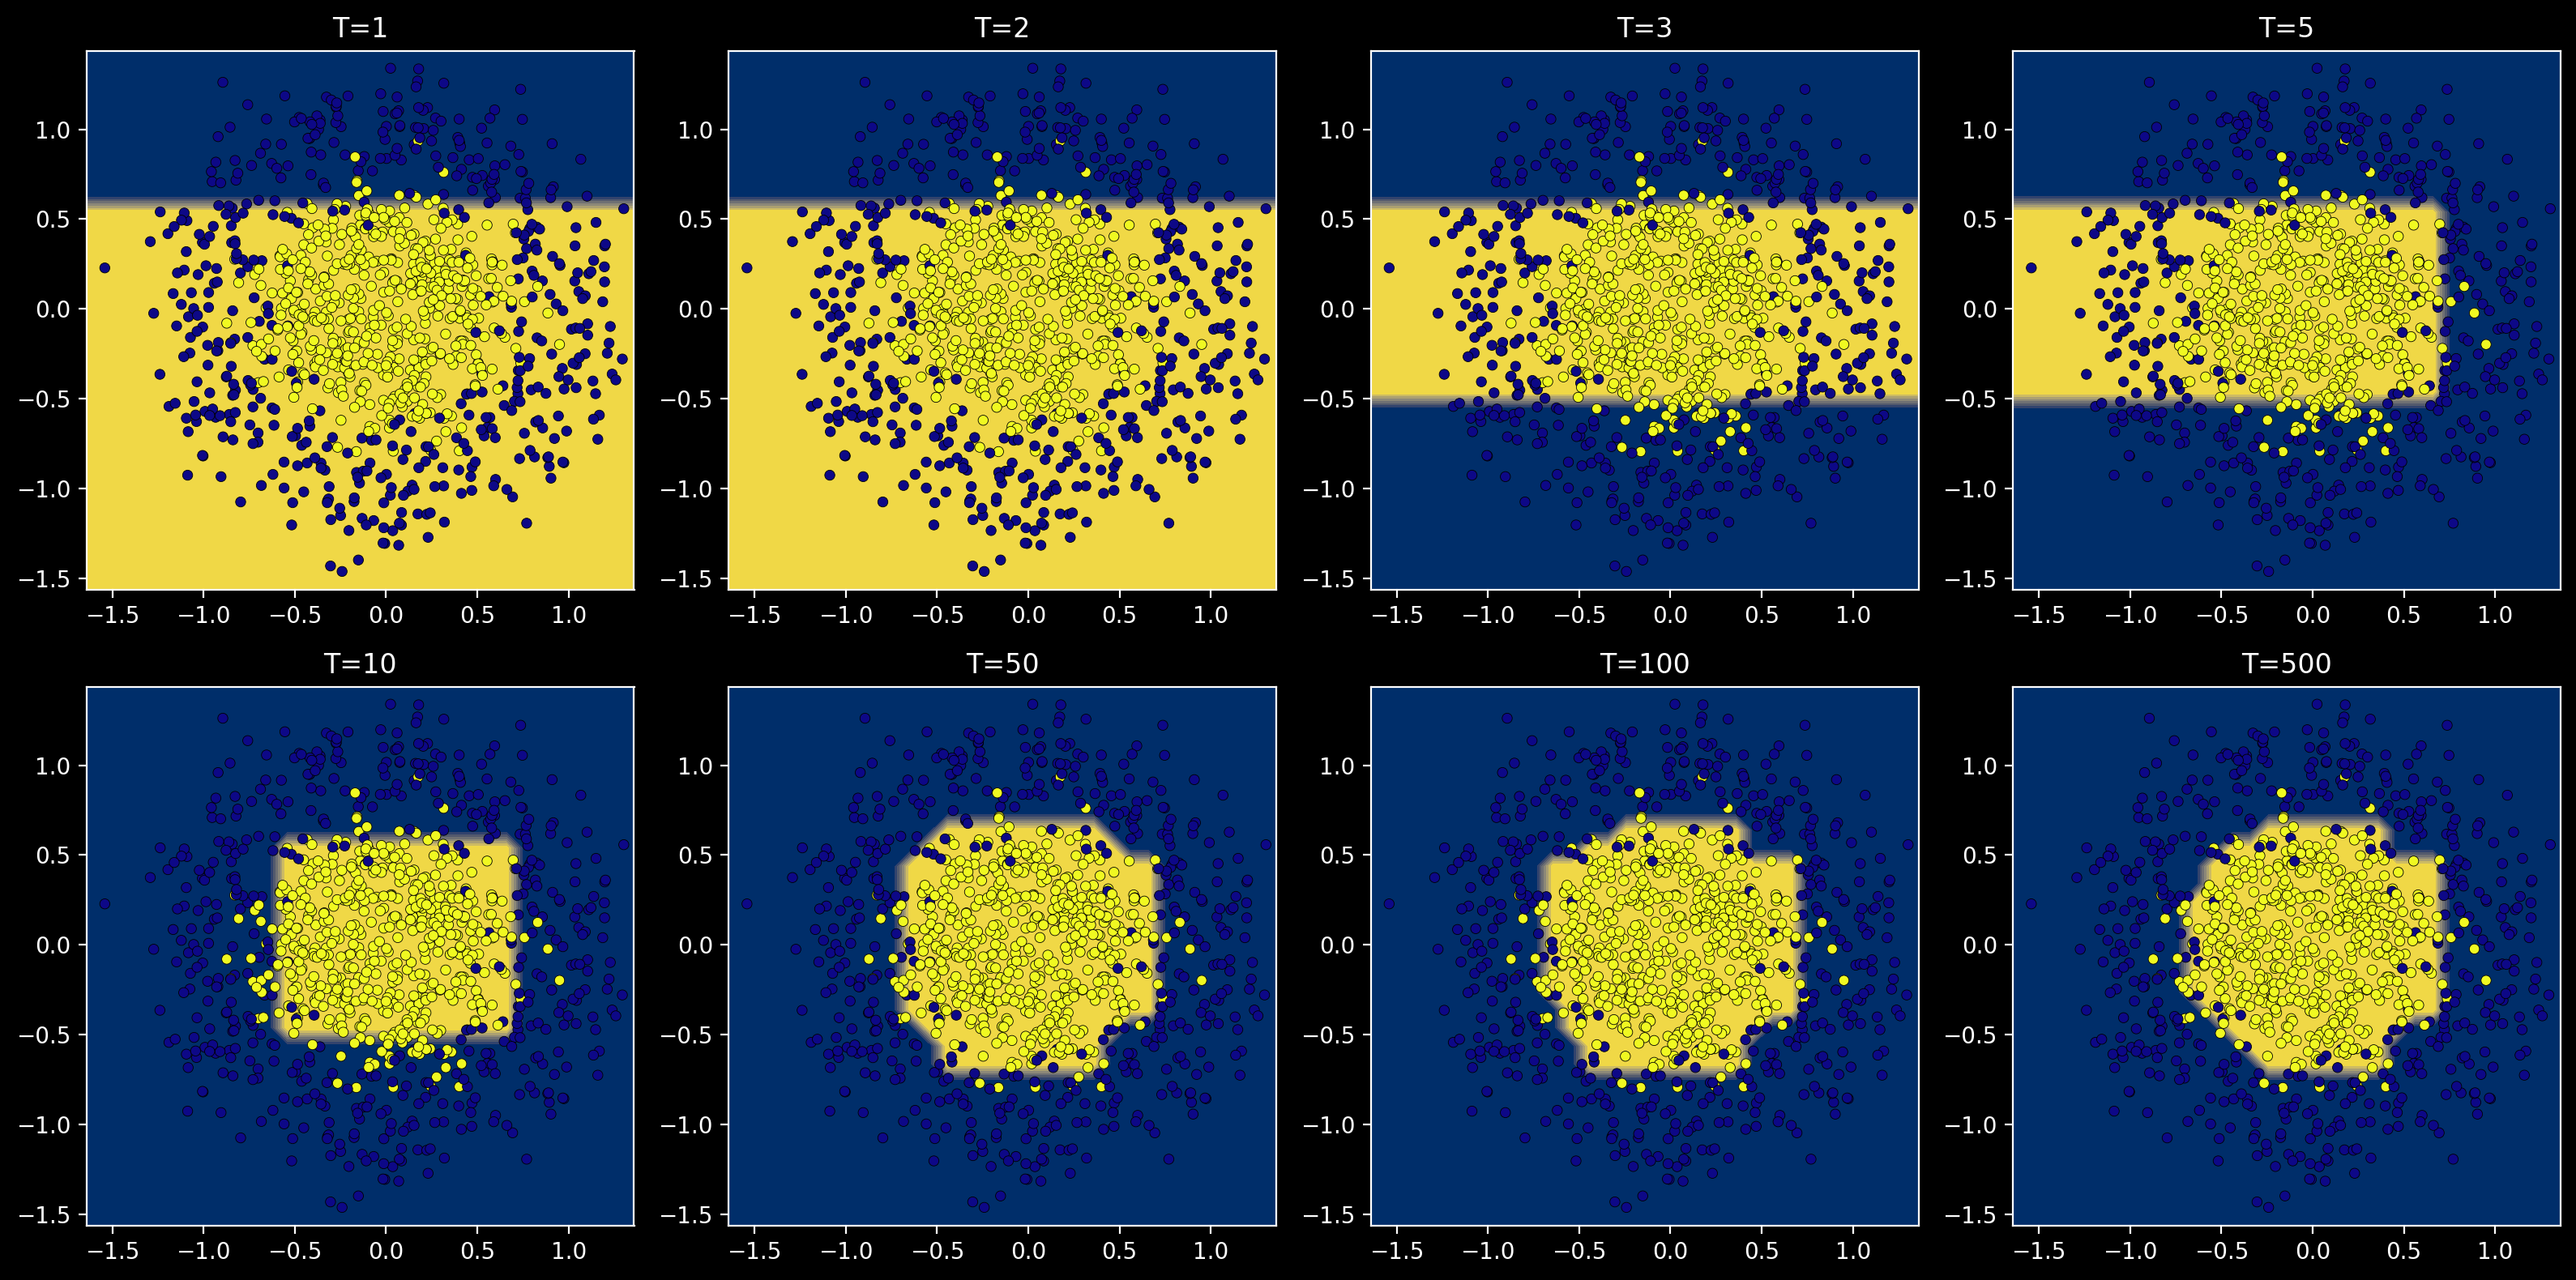

In [5]:
x_data, y_data = make_circles(n_samples=1000, noise=0.2, factor=0.4, random_state=42)
y_data = np.where(y_data == 0, -1, 1)                                   # Convert labels to -1 and 1
# TODO 3: Pass 1, 2, 3, 5, 10, 50, 100, 500 for the T_vals
T_vals = [1, 2, 3, 5, 10, 50, 100, 500]
plot_adaboost_contours(x_data, y_data, T_vals)

- It's clear that the third classifier decided to draw it's decision boundary differently, explain why did it do that despite the fact the previous two classifiers did not. In other words, what ha\s changed in the dataset to make draw such boundary?

In [6]:
'''
Answer goes here
data it self as x_train y_train dosent change  weights is what has been changed it give more weights to the wrong data so 
he become better than past classifier
'''

'\nAnswer goes here\ndata it self as x_train y_train dosent change  weights is what has been changed it give more weights to the wrong data so \nhe become better than past classifier\n'

- Why are the decision boundaries found by Adaboost in the instances above discontinuous?

In [7]:
'''
AdaBoost combines many simple classifier which make this discontinuous
'''

'\nAdaBoost combines many simple classifier which make this discontinuous\n'

#### Choosing the Number of Estimators T

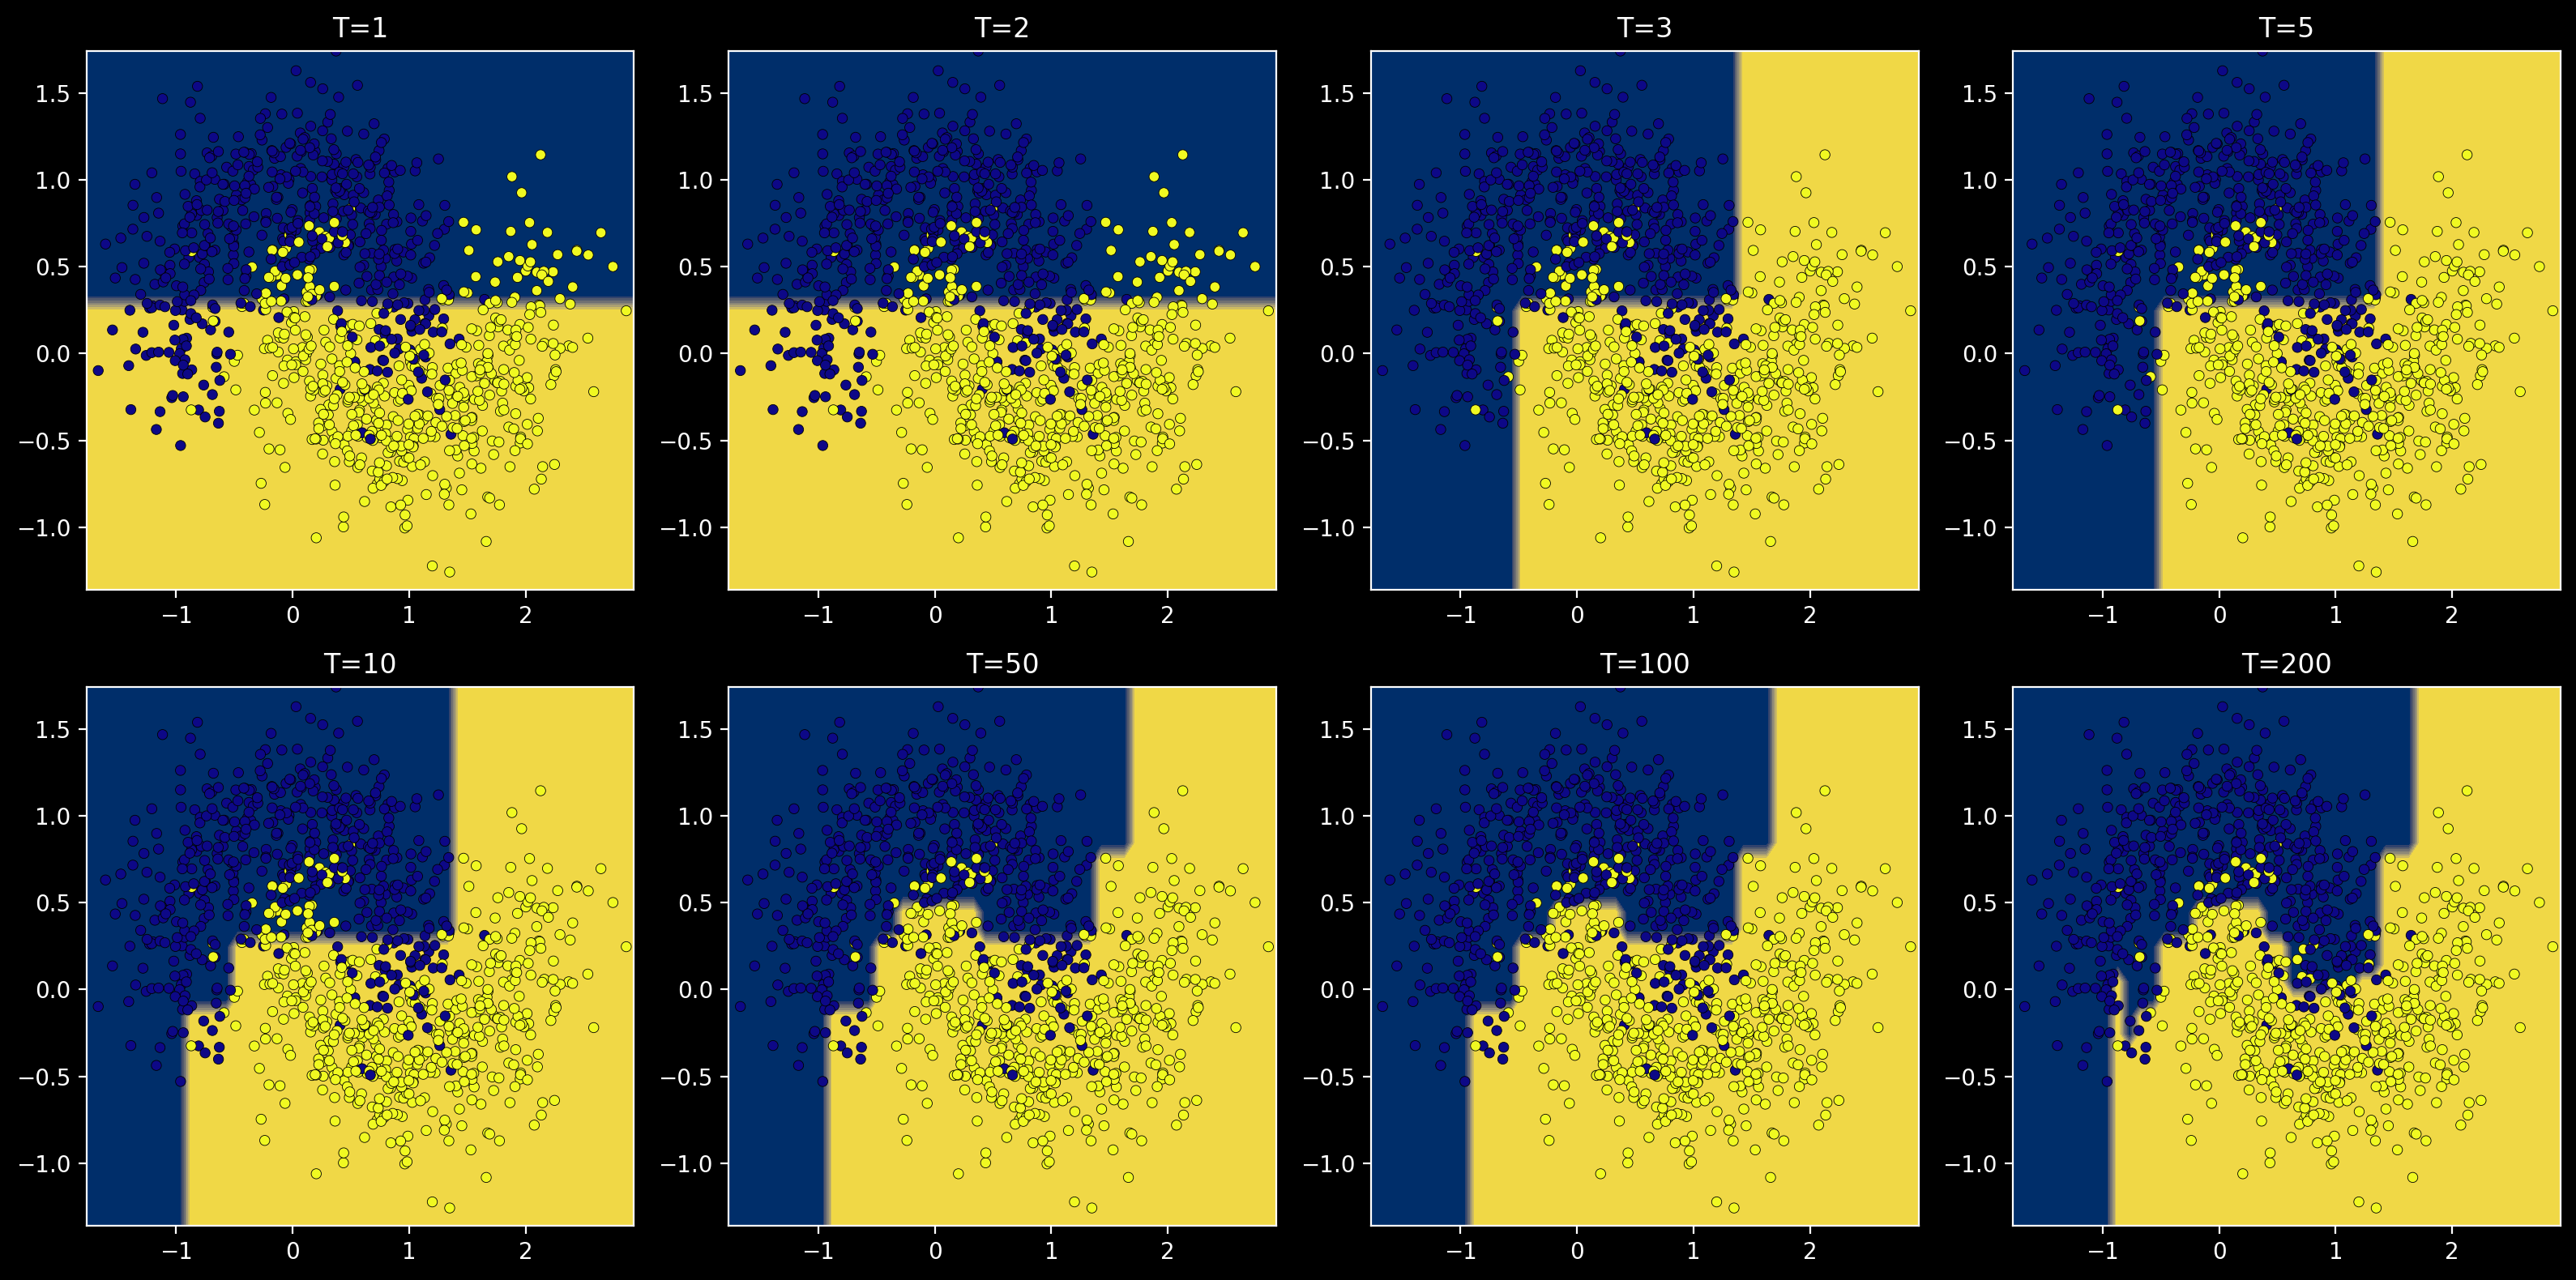

In [8]:
x_data, y_data = make_moons(n_samples=1000, noise=0.3, random_state=42)
y_data = np.where(y_data == 0, -1, 1)                                   # Convert labels to -1 and 1
# TODO 4: Pass 1, 2, 3, 5, 10, 50, 100, 200 for the T_vals
T_vals = [1, 2, 3, 5, 10, 50, 100, 200]
plot_adaboost_contours(x_data, y_data, T_vals)

- What do you think is an optimal value for $T$ given these plots? 

In [9]:
'''
Answer goes here
 I think 50 is okay
'''

'\nAnswer goes here\n I think 50 is okay\n'

- Given these plots how do you imagine the training loss curve? What technique would you use to automatically stop increasing T?

In [10]:
'''
initially loss is very high and then with t increase it will reduce even it it may be there is no loss but this mean model is overfitting
Early Stopping'''

'\ninitially loss is very high and then with t increase it will reduce even it it may be there is no loss but this mean model is overfitting\nEarly Stopping'

#### Adaboost Robustness

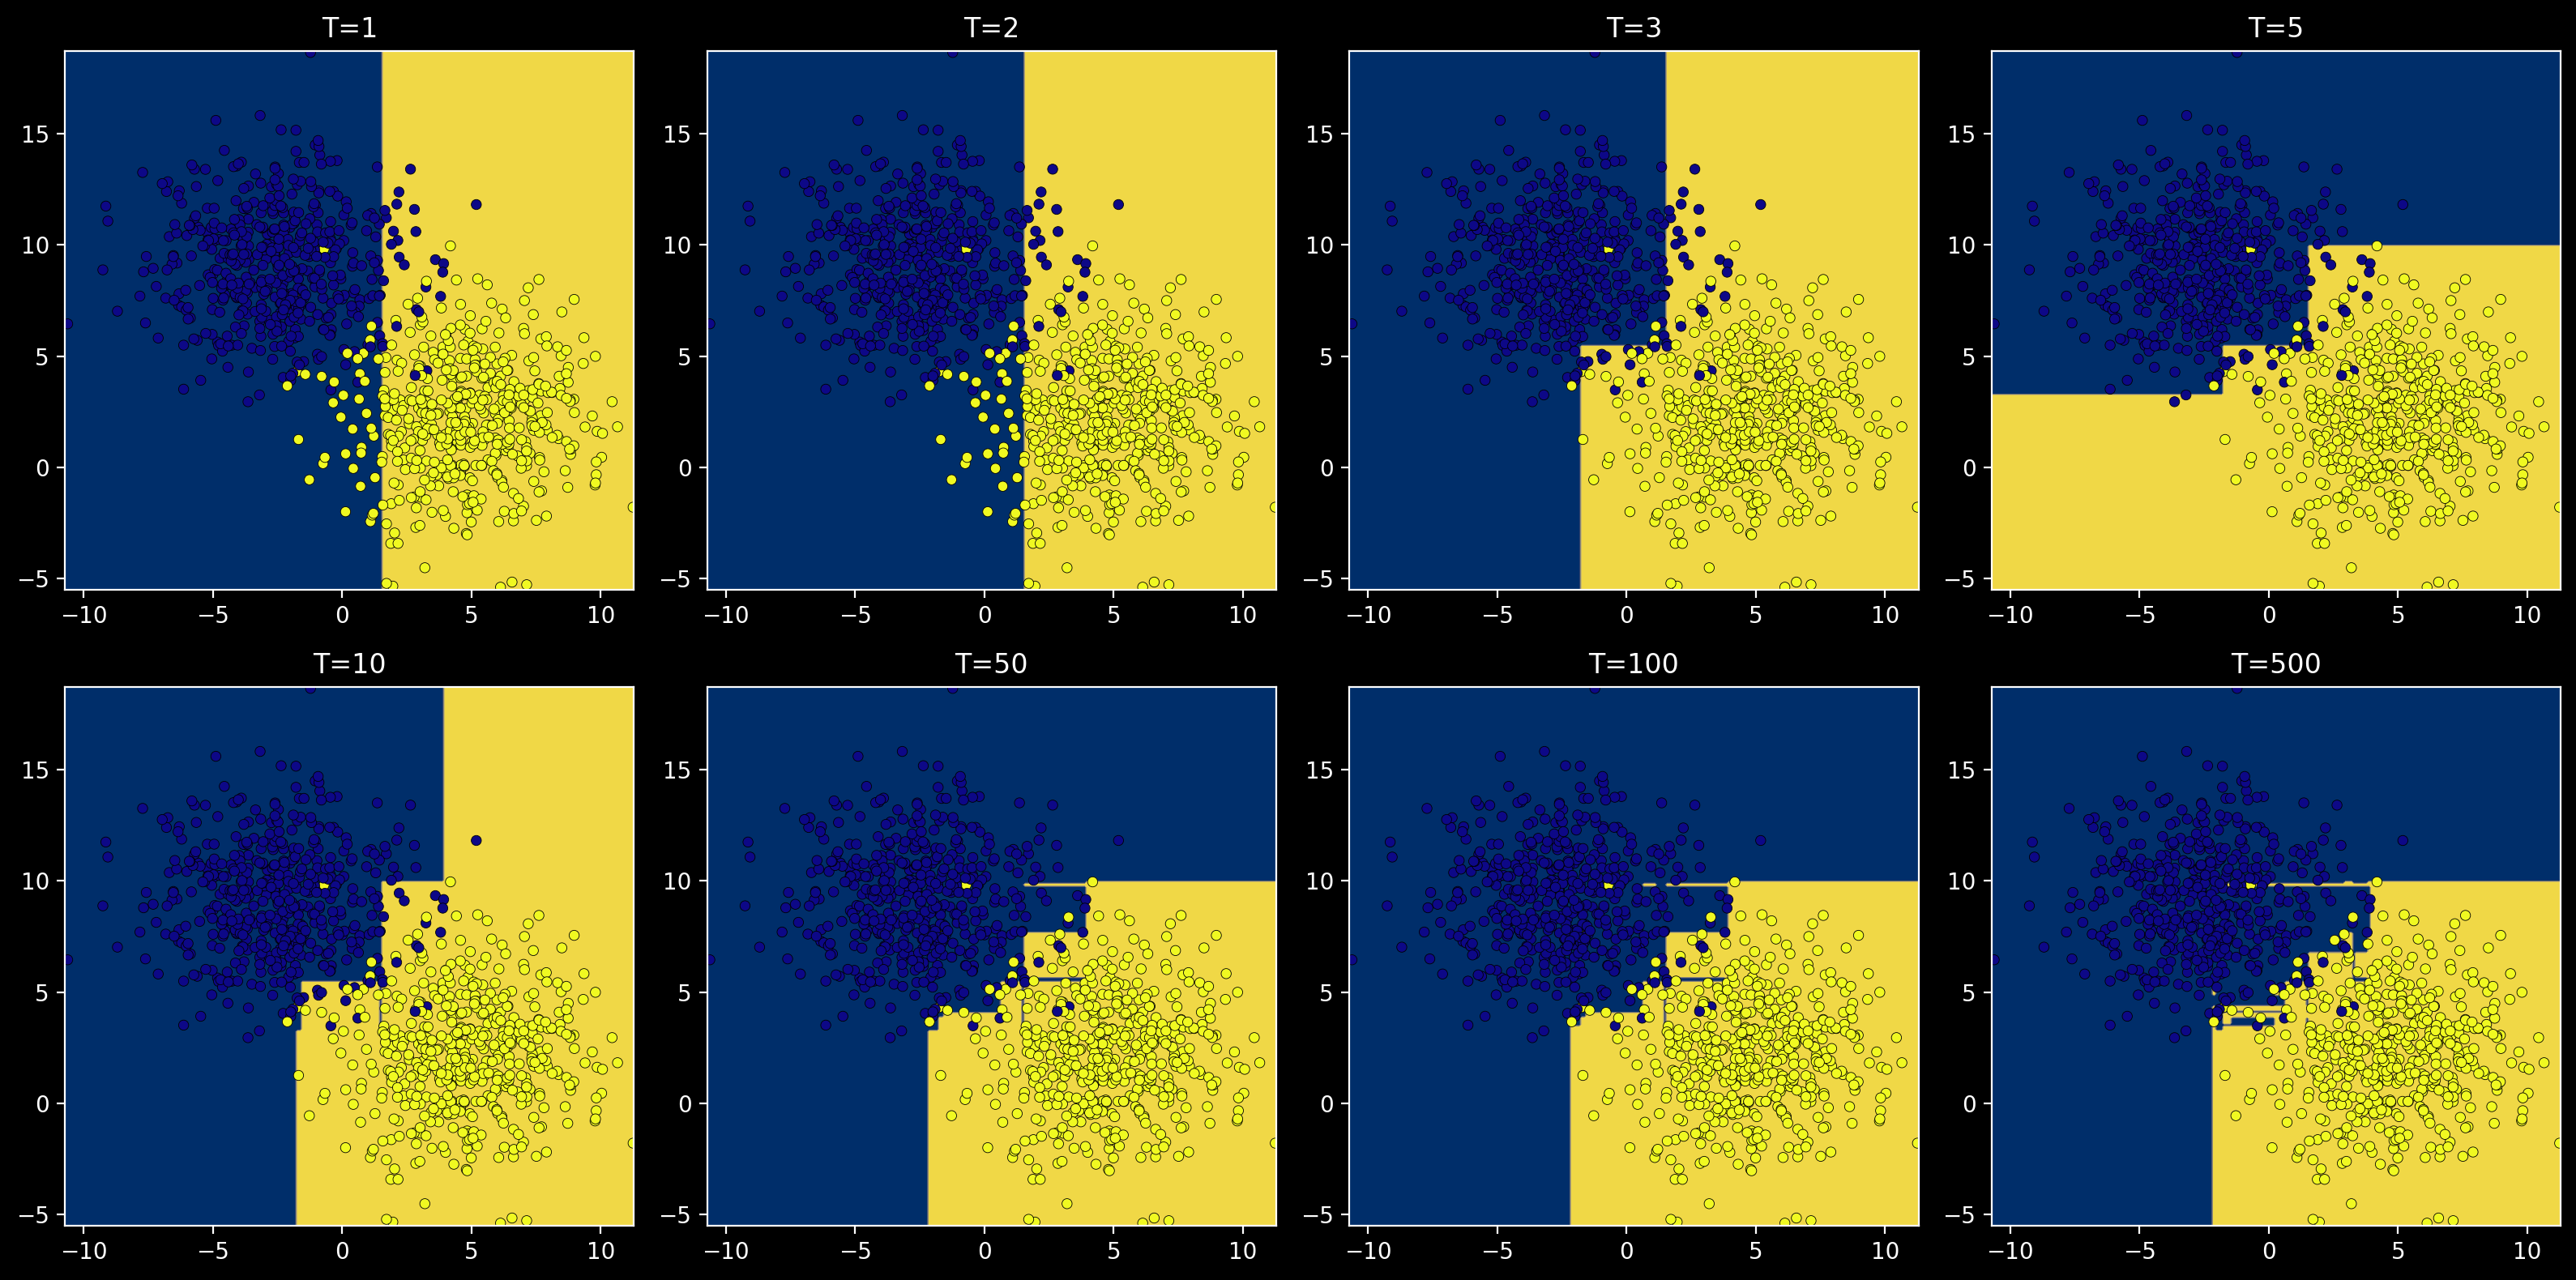

In [11]:
x_data, y_data = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=2.5, random_state=42)
y_data = np.where(y_data == 0, -1, 1)                                   # Convert labels to -1 and 1

# TODO 5: Pass 1, 2, 3, 5, 10, 50, 100, 500 for the T_vals
T_vals = [1, 2, 3, 5, 10, 50, 100, 500]
plot_adaboost_contours(x_data, y_data, T_vals)

- How do you imagine the decision boundary from LDA and is it better and worse than that due to Adaboost here and why?

In [12]:
'''
LDA IS better data look as linear seperable
'''

'\nLDA IS better data look as linear seperable\n'

### ✨ Extra Requirements List

- Make minor modifications to the function above so it itakes an arbitrary list of classifier objects and visualize the decision boundary of GNB, LDA, QDA and Adaboost.

- Let the constructor take the config (object) of the base classifier and try out something different from the decision stump

<div align="center">
    <img src="https://media1.tenor.com/m/eUBg0uKpgZIAAAAd/youve-done-an-amazing-job-lewis-jackson.gif">
</div>